# UC Berkeley MIDS 207 Final Project Notebook
## Project team: Samantha Brownstein, Mona Gogia, Madison Myers, Ganesh Sundararajan
This notebook is intended for predicting bike rental count using training data from Kaggle competition as part of project requirement for W207-1, Intro to Machine Learning, Fall 2016.

The Kaggle data can be downloaded from https://www.kaggle.com/c/bike-sharing-demand/data.
The data consists of training data as well as test data.
The objective is to predict the number of bikes that would be rented based on input variables from the test data.
The format of the training data and test data can be obtained from the above mentioned site.

We use the Kaggle score as an indicator for the accuracy of the prediction and to improve our models. For details on how Kaggle score is obtained please refer to https://www.kaggle.com/c/bike-sharing-demand/details/evaluation. Scores on the public leaderboard from May 2014 - May 2015 range from 4.76189 to 0.33757, with the lowest score being the best.

### OVERVIEW & PROBLEM DESCRIPTION
Predicting bike use in a bikeshare system is an interesting and pertinent problem for our time. With private app developers relentlessly searching for the best form of supplemental transportation, public transportation becoming increasingly overcrowded, and a growing demand to curb climate change, understanding the dynamic demand of bikeshare users is more relevant than ever. Moreover, studying this kind of prediction and landscape can allow researchers to better understand people’s mobility by better understanding how users travel within the city.

### DATA:
We came across this problem on Kaggle, where the data is hosted. The data is provided by Washington D.C.’s Capital Bikeshare and consists of hourly ridership data as well as weather, time and other data collected over the span of two years. Clone or download the .csv data files in our Github Repository found here: https://github.com/MadisonJMyers/W207

### PROJECT GOALS
1. Find the best performing classifier for this particular problem.
2. Predict bike rental demand.
3. Attain the most accurate prediction within the allotted time period.

### RESULTS
Via Jupyter Notebook, our team conducted a comparative exploration into different classifiers, using the data given, numpy, pandas, matplotlib and scikit learn. In the time allotted for this class project, we explored the data through histograms, plotting and applied linear regression, K Nearest Neighbors, Random Forests and SVM with best KAGGLE scores of 1.42884, 0.94964, 0.45493  and 0.44726 accordingly. 

## In This Notebook:

### 1. Exploration of Bike Sharing Data
### 2. Classifier Application
### 3. Pandas Application
### 4. Final Results & Conclusion
### 5. Future Extensions

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import csv, numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression 
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GMM
from math import exp, expm1, log
from datetime import datetime
from sklearn import svm
from sklearn import linear_model
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

## Load Data

In [2]:
file_paths = ['C:\Users\prashoo\Desktop\W207\Project\train.csv', 'C:\Users\prashoo\Desktop\W207\Projecttest.csv']
def clean(path):
    df = pd.read_csv(path, parse_dates=[0], index_col=0)
    return df

## Exploration of Bike Sharing Data

In this section we read the downloaded data (in XLS format) as training data and test data, and prepare the data for initial exploration. The initial exploration involves the following phases:
1.  Plot histograms of the the raw data from the training set as well as test data to see how they are distributed
2.  Run some basic exploration regression as well as classification models to see what kind of Kaggle scores we get
3.  Determine what classifier/regressor gives us the best score


In [3]:
#Denote Training Data Frame and Test
TrainDF = clean(file_paths[0])
TestDF = clean(file_paths[1])

#Get features in data
features = TrainDF.columns.values[:-3]
print ("Features in Data: ")
print (features)
# Print out first 5 
print ("\nFirst 10 examples: ")
print (TrainDF.head(10))

# Array sizes
print ("\nTrain: {}".format(TrainDF.shape))
print ("Test: {}".format(TestDF.shape))

IOError: File C:\Users\prashoo\Desktop\W207\Project	rain.csv does not exist

In [2]:
# Training data
train_file  = open('train.csv', "r")
bike_train = csv.reader(train_file)

header_row = True
train_data, train_labels = [], []                #'labels' denotes variable names
for row in bike_train:
    # Save header row.
    if header_row:
        header = row
        header_row = False
    else:
        train_data.append(row)
        train_labels.append(header)

train_data = np.array(train_data)
train_labels = np.array(train_labels)
        
train_file.close()


# Test Data
test_file  = open('test.csv', "r")
bike_test = csv.reader(test_file)
header_row = True
test_data, test_labels = [], []
for row in bike_test:
    # Save header row.
    if header_row:
        header = row
        header_row = False
    else:
        test_data.append(row)
        test_labels.append(header)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
        
test_file.close()


conv_train_data = np.zeros(train_data.shape)

for row in range(0, train_data.shape[0]):
    for col in range(1, train_data.shape[1]):
        conv_train_data[row, col] = train_data[row, col]
        

conv_test_data = np.zeros(test_data.shape)

for row in range(0, test_data.shape[0]):
    for col in range(1, test_data.shape[1]):
        conv_test_data[row, col] = test_data[row, col]
        
# For now remove to date and time
# Also remove the registered and casual columns.  This is for initial exploration
new_train_data = conv_train_data[:, 1:conv_train_data.shape[1]-3]
new_output_data = conv_train_data[:, conv_train_data.shape[1]-1]
new_test_data = conv_test_data[:, 1:conv_test_data.shape[1]]

new_train_labels = train_labels[:, 1:train_labels.shape[1]-3]
new_test_labels = test_labels[:, 1:test_labels.shape[1]]


Plot the training data first to see the distributions and correlations.
-----------------------------------------------------



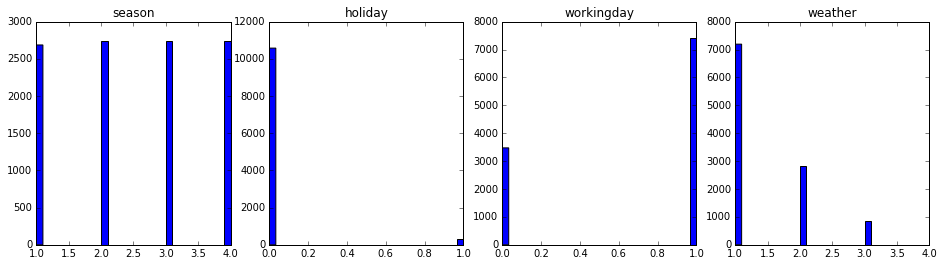

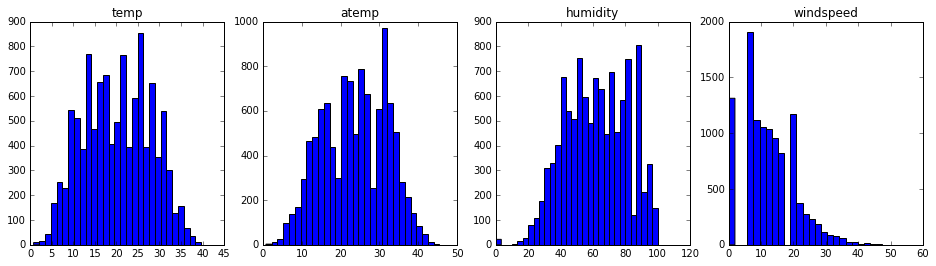

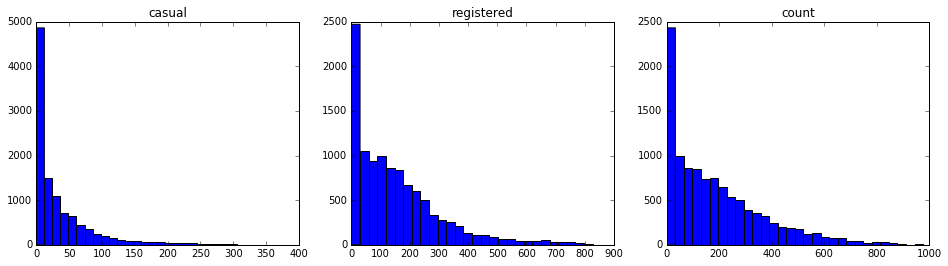

In [3]:
# Training data histograms
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))

for ii in np.arange(1, 5):
    ax = axes[ii-1]
    ax.hist([int(val) for val in train_data[:,ii]], bins=30) 
    ax.set_title(train_labels[0][ii])

plt.show()

fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))
for ii in np.arange(5, 9):
    ax = axes[ii-5]
    ax.hist([float(val) for val in train_data[:,ii]], bins=30) 
    ax.set_title(train_labels[0][ii])

plt.show()

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize = (16, 4))
for ii in np.arange(9, 12):
    ax = axes[ii-9]
    ax.hist([float(val) for val in train_data[:,ii]], bins=30) 
    ax.set_title(train_labels[0][ii])

plt.show()

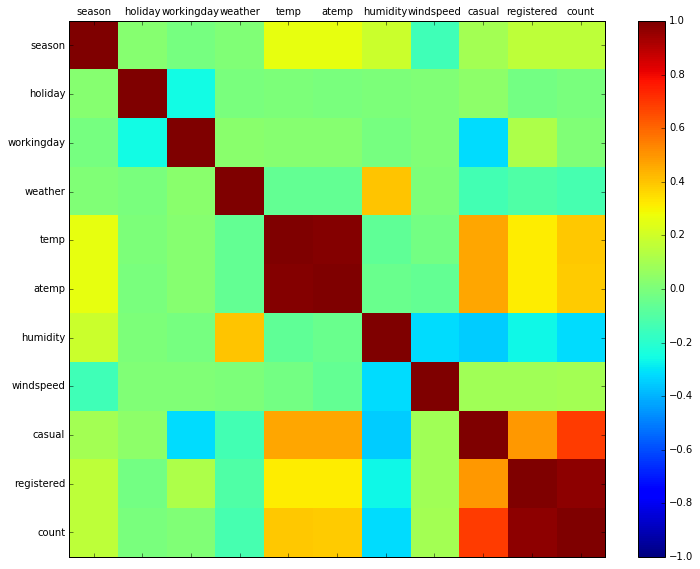

In [4]:
#Training data correlation matrix

x = np.zeros(train_data.shape)

for row in range(0, train_data.shape[0]):
    for col in range(1, train_data.shape[1]):
        x[row, col] = train_data[row, col]     

train_data_corr = x[:, 1:x.shape[1]]
train_labels_corr = train_labels[:, 1:train_labels.shape[1]]


data = pd.DataFrame(data=train_data_corr, columns=train_labels_corr[0])

correlations = data.corr()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax,shrink=.8)
ticks = np.arange(0,11)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(train_labels_corr[0])
ax.set_yticklabels(train_labels_corr[0])
plt.show()

The 'casual' and 'registered' variables indicate the number of non-registered and registered user rentals, respectively. Their sum is the 'count' variable. From the plots, it looks like casual and registered users are providing more granualar details for prediction rather than just predicting count directly (which we show later in this notebook). The distributions of casual and registered do not look normal.  We do a log transformation to see if we can make these distributions more normal.

Intuitively, we see that 'atemp' and 'temp' are highly correlated, so only one of these parameters is needed for further analysis.  This is also shown in the correlation matrix.

Because temp, humidity, windspeed are continuous variables, we think that binning might help with interpretation. Since there are so many values, a difference of 1 or 2 * will not make a big difference in bike rentals. So we convert the temp from raw values to bucket values, and we do the same binning for humidity and windspeed.

We can see that casual and working day are inversely correlated. This can be intutively explained during working days casual renters are going to be low.
None of the independent variables (except atemp and temp) show very high degree of correlation.  The correlation factor is <= 0.2 is almost all cases, which is good.

Lets do a log transformation to see if the output variables transfer themselves to kind of Gaussian
Indeed they start becoming a little bit Gaussian (not perfect though)

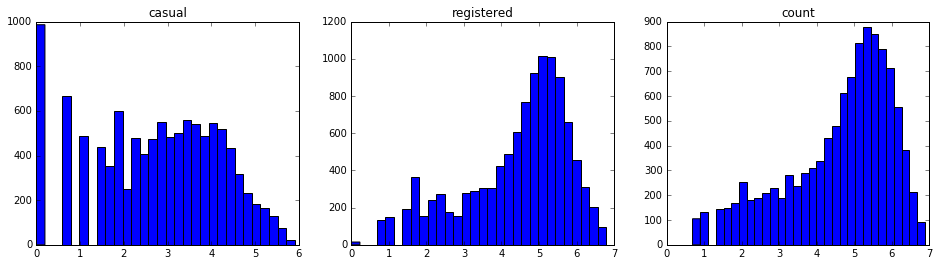

In [5]:
log_output_vars = np.empty( (train_data.shape[0], 3 ))

for i in range (0, train_data.shape[0]):
    log_output_vars[i][0] = log( float(train_data[i][9])+1 ) 
    log_output_vars[i][1] = log( float(train_data[i][10])+1 ) 
    log_output_vars[i][2] = log( float(train_data[i][11])+1 )

fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize = (16, 4))
for ii in np.arange(0, 3):
    ax = axes[ii]
    ax.hist([val for val in log_output_vars[:,ii]], bins=30) 
    ax.set_title(train_labels[0][9+ii])



Now we plot histograms for the test data.

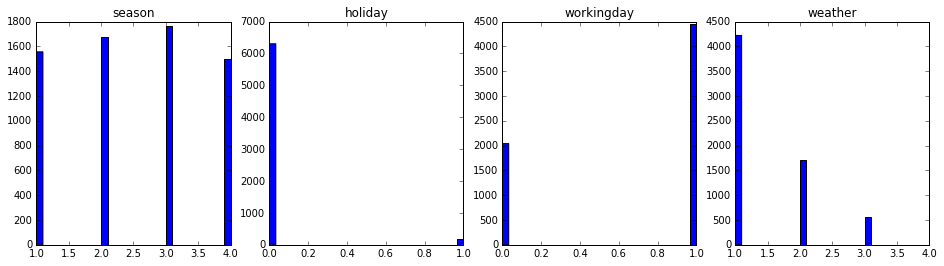

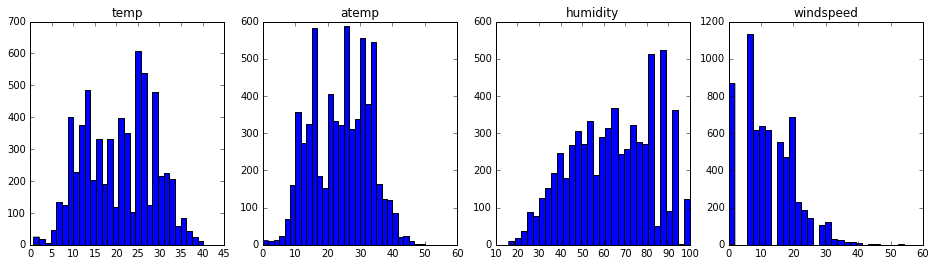

In [6]:
# Test data histogram
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))

for ii in np.arange(1, 5):
    ax = axes[ii-1]
    ax.hist([int(val) for val in test_data[:,ii]], bins=30) 
    ax.set_title(test_labels[0][ii])

plt.show()

fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize = (16, 4))
for ii in np.arange(5, 9):
    ax = axes[ii-5]
    ax.hist([float(val) for val in test_data[:,ii]], bins=30) 
    ax.set_title(test_labels[0][ii])

plt.show()

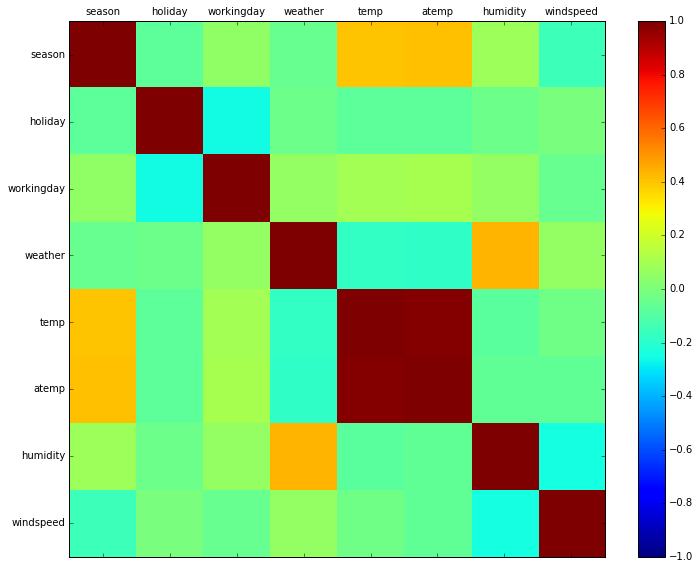

In [8]:
#Test data correlation matrix

x = np.zeros(test_data.shape)

for row in range(0, test_data.shape[0]):
    for col in range(1, test_data.shape[1]):
        x[row, col] = test_data[row, col]     

test_data_corr = x[:, 1:x.shape[1]]
test_labels_corr = test_labels[:, 1:test_labels.shape[1]]


data = pd.DataFrame(data=test_data_corr, columns=test_labels_corr[0])

correlations = data.corr()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax,shrink=.8)
ticks = np.arange(0,8)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(test_labels_corr[0])
ax.set_yticklabels(test_labels_corr[0])
plt.show()

The testdata correlation matrix also exhibits the same kind of charecteristics like the training data.  So whatever we said for train data holds good for test data as well. 

## Classifier Application
-------------------

We conduct basic analysis to see what Kaggle scores are attained using:
1. Linear regression model - Here we are going to see if we can remove the temp or atemp variable to simplify the model as we have already seen they are highly correlated.
2. K-Neighbors Classifier
3. Random Forest Classifier
4. SVM Classifier


### 1. Linear Regression

In [9]:
lr = LinearRegression(fit_intercept=True)
# Count is the output for which the input is trained
lr.fit(new_train_data, new_output_data) 
lr_preds = lr.predict(new_test_data)

test_lab_f = open("linear_labeled.csv", "w") # you will need to edit this directory

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0

# We get -ve values.  For now just fix it 0s it is exploration only
for pp in lr_preds:    
    test_lab_f.write("\n")
    if ( pp < 0.0 ):
        pp = 0.0
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()

# The Kaggle score returned was 1.43455

Use the linear model to see what scores we get by removing atemp or temp

In [10]:
# Lets try linear model by removing one at a time to see the score
# Remove temp first
mod_train_data = np.delete(new_train_data, np.s_[4], axis=1)
mod_train_labels = np.delete(new_train_labels, np.s_[4], axis=1)
mod_test_data = np.delete(new_test_data, np.s_[4], axis=1)
mod_test_labels = np.delete(new_test_labels, np.s_[4], axis=1)

lr = LinearRegression(fit_intercept=True)
lr.fit(mod_train_data, new_output_data) 
lr_preds = lr.predict(mod_test_data)


test_lab_f = open("linear_labeled_ntemp.csv", "w") # you will need to edit this directory

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in lr_preds:    
    test_lab_f.write("\n")
    if ( pp < 0.0 ):
        pp = 0.0
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()

# The score was 1.43445


# Remove atemp 
mod_train_data = np.delete(new_train_data, np.s_[5], axis=1)
mod_train_labels = np.delete(new_train_labels, np.s_[5], axis=1)
mod_test_data = np.delete(new_test_data, np.s_[5], axis=1)
mod_test_labels = np.delete(new_test_labels, np.s_[5], axis=1)

lr = LinearRegression(fit_intercept=True)
# Count is the output for which the input is trained
lr.fit(mod_train_data, new_output_data) 
lr_preds = lr.predict(mod_test_data)

test_lab_f = open("linear_labeled_natemp.csv", "w") # you will need to edit this directory

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in lr_preds:    
    test_lab_f.write("\n")
    if ( pp < 0.0 ):
        pp = 0.0
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()

# The score was 1.42884 

Removing atemp improved the score.  Removing the temp did not make any change to the score.

Therefore, we will go with data without atemp.

*The atemp by intution is not a good measure as it is a "feels" like temprature which is not very accurate.


### 2. KNN

Now applying the Kneighbour classifier with the full set.  Also vary the number of neighbors to see if which one gives us better kaggle score.

In [11]:
kn = KNeighborsClassifier(n_neighbors=1)

kn.fit(new_train_data, new_output_data)
kn.preds = kn.predict(new_test_data)
#print 'K-Neighbors Prediction'
#print kn.preds

test_lab_f = open("kneigh_labeled.csv", "w") # you will need to edit this directory

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in kn.preds:    
    test_lab_f.write("\n")
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()

# Score is 1.66165

# Now lets try with the data that got us the lowest linear regresion score
kn = KNeighborsClassifier(n_neighbors=1)

kn.fit(mod_train_data, new_output_data)
kn.preds = kn.predict(mod_test_data)


test_lab_f = open("kneigh_labeled_natemp.csv", "w") # you will need to edit this directory

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in kn.preds:    
    test_lab_f.write("\n")
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()
# Score is 1.6585

# Now lets vary the n_neightbors

for i in range(2, 4):
    kn = KNeighborsClassifier(n_neighbors=i)

    kn.fit(mod_train_data, new_output_data)
    kn.preds = kn.predict(mod_test_data)


    test_lab_f = open("kneigh_labeled_natemp_"+str(i)+".csv","w")

    test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

    idx = 0
                     
    for pp in kn.preds:    
        test_lab_f.write("\n")
        test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
        idx += 1
   

    test_lab_f.close()  
    
# Neighbors=2, Score 1.76267
# Neighbors=3, Score 1.90713
# The score increases.  So increasing the neighbors not a good idea
    

Now add a few more variables into our preliminary model.  We are going to rerun our analysis.  At the same time we are going to add random forest classifier to see if we get better Kaggle score.

In [12]:
# Now we are going to instrument the date and time 
# Then run the linear regression, kneighbors and random-forest

inst_array = np.empty( (train_data.shape[0], 4) )

for i in range (0, train_data.shape[0]):
    date = datetime.strptime(train_data[i][0], "%Y-%m-%d %H:%M:%S")
    inst_array[i][0] = date.weekday()
    inst_array[i][1] = date.hour
    inst_array[i][2] = date.minute
    inst_array[i][3] = date.second

instrument_train_array = np.concatenate( (inst_array, new_train_data), axis = 1 )

inst_array = np.empty( (test_data.shape[0], 4) )

for i in range (0, test_data.shape[0]):
    date = datetime.strptime(test_data[i][0], "%Y-%m-%d %H:%M:%S")
    inst_array[i][0] = date.weekday()
    inst_array[i][1] = date.hour
    inst_array[i][2] = date.minute
    inst_array[i][3] = date.second    

instrument_test_array = np.concatenate( (inst_array, new_test_data), axis = 1 )


lr = LinearRegression(fit_intercept=True)
lr.fit(instrument_train_array, new_output_data) 
lr_preds = lr.predict(instrument_test_array)


test_lab_f = open("linear_labeled_instrument.csv", "w") # you will need to edit this directory

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in lr_preds:    
    test_lab_f.write("\n")
    if ( pp < 0.0 ):
        pp = 0.0
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()

# The score returned was 1.26685

kn = KNeighborsClassifier(n_neighbors=1)

kn.fit(instrument_train_array, new_output_data)
kn.preds = kn.predict(instrument_test_array)

test_lab_f = open("kneigh_labeled_instrument.csv", "w") # you will need to edit this directory

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in kn.preds:    
    test_lab_f.write("\n")
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()

# test score 0.94964


### Random Forests

In [13]:
rf = RandomForestClassifier()

# Train the model
clf = rf.fit(instrument_train_array, new_output_data)
results = clf.predict(instrument_test_array)


test_lab_f = open("rf_vanilla.csv", "w") # you will need to edit this directory

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in results:    
    test_lab_f.write("\n")
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()


# Test score rf vanilla = 0.88612

We are going with random forest classifier.  But we are going to complete our preliminary run with all the things we said at the outset before we take out the the other classifiers and regressors.

Even though we have determined that removing atemp was a good option, we still chose to use it.
Now we are running the linear regression, kneighbours as well as random forest classifiers without atemp.

In [14]:
# Remove atemp as we have determined before that removing atemp makes score better
mod_instrument_train_data = np.delete(instrument_train_array, np.s_[9], axis=1)
mod_instrument_test_data = np.delete(instrument_test_array, np.s_[9], axis=1)

lr = LinearRegression(fit_intercept=True)
# Count is the output for which the input is trained
lr.fit(mod_instrument_train_data, new_output_data) 
lr_preds = lr.predict(mod_instrument_test_data)


test_lab_f = open("linear_labeled_natemp_instrument.csv", "w") # you will need to edit this directory

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in lr_preds:    
    test_lab_f.write("\n")
    if ( pp < 0.0 ):
        pp = 0.0
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()

# The score was 1.26607 

kn = KNeighborsClassifier(n_neighbors=1)

kn.fit(mod_instrument_train_data, new_output_data)
kn.preds = kn.predict(mod_instrument_test_data)

test_lab_f = open("kneigh_labeled_natemp_instrument.csv", "w") # you will need to edit this directory

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in kn.preds:    
    test_lab_f.write("\n")
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()

# test score 0.91618
np.random.seed(415)

rf = RandomForestClassifier()

# Train the model
clf = rf.fit(mod_instrument_train_data, new_output_data)
results = clf.predict(mod_instrument_test_data)


test_lab_f = open("rf_vanilla_natemp.csv", "w") # you will need to edit this directory

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in results:    
    test_lab_f.write("\n")
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()

# Test score rf vanilla = 0.88345

As expected the Kaggle score went down across the board.  So removing atemp was indeed a good idea.
From this point we are going to focus on random forest classifier to do all instrumentation to lower our kaggle score.  Then we will jump back to regressor as we predict our problem is a regression problem and a regressor will give us the best results.

So far we were predicting the count as the output, but the training data has broken the count output into registered and casual (added them together to get the count).
We are going to do the same as splitting them intutively will make the classifiers more accurate.

In [15]:
# Instead of predicting count, predict registered and casual.  Then add them to predict the count
registered_output_data = conv_train_data[:, conv_train_data.shape[1]-2]
casual_output_data = conv_train_data[:, conv_train_data.shape[1]-3]

np.random.seed(415)

rf = RandomForestClassifier()

# Train the model
clf = rf.fit(mod_instrument_train_data, registered_output_data)
results_registered = clf.predict(mod_instrument_test_data)

clf = rf.fit(mod_instrument_train_data, casual_output_data)
results_casual = clf.predict(mod_instrument_test_data)

results = np.add(results_registered, results_casual)
test_lab_f = open("rf_split_natemp.csv", "w") 

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in results:    
    test_lab_f.write("\n") 
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()
# Score 0.78115


As we saw in the histograms we can do some binning for the temperature, humidity, and windspeed.
*These are continous variables and binning them makes their interpretation better for the model.  Ease of interpretation is better for accuracy.

In [16]:
bin_train_data = np.empty( (mod_instrument_train_data.shape[0], mod_instrument_train_data.shape[1]) )
bin_test_data = np.empty( (mod_instrument_test_data.shape[0], mod_instrument_test_data.shape[1]) )

bin_train_data[:] = mod_instrument_train_data
bin_test_data[:] = mod_instrument_test_data
# Based on the histogram it looks like we can bin the temp into 6 or 7 bins
train_temp_bin = np.empty( bin_train_data.shape[0] )
for i in range(0, bin_train_data.shape[0]):
    if ( bin_train_data[i][8] < 1.0* 5):
        train_temp_bin[i] = 1 
    elif ( bin_train_data[i][8] < 1.0* 10):
        train_temp_bin[i] = 2 
    elif ( bin_train_data[i][8] < 1.0 * 15):
        train_temp_bin[i] = 3 
    elif ( bin_train_data[i][8] < 1.0 * 20):
        train_temp_bin[i] = 4 
    elif ( bin_train_data[i][8] < 1.0 * 25):
        train_temp_bin[i] = 5         
    elif ( bin_train_data[i][8] < 1.0 * 30):
        train_temp_bin[i] = 6 
    elif ( bin_train_data[i][8] < 1.0 * 35):
        train_temp_bin[i] = 7     
    elif ( bin_train_data[i][8] < 1.0* 40):
        train_temp_bin[i] = 8 
    else:
        train_temp_bin[i] = 9 
# Now replace temp with the binning value in the instrumented array
bin_train_data[:,8] = train_temp_bin

# Do the same for humditity
train_humid_bin = np.empty( bin_train_data.shape[0] )
for i in range(0, bin_train_data.shape[0]):
    if ( bin_train_data[i][9] < 1.0* 10):
        train_humid_bin[i] = 1 
    elif ( bin_train_data[i][9] < 1.0* 20):
        train_humid_bin[i] = 2 
    elif ( bin_train_data[i][9] < 1.0 * 30):
        train_humid_bin[i] = 3 
    elif ( bin_train_data[i][9] < 1.0 * 40):
        train_humid_bin[i] = 4 
    elif ( bin_train_data[i][9] < 1.0 * 50):
        train_humid_bin[i] = 5        
    elif ( bin_train_data[i][9] < 1.0 * 60):
        train_humid_bin[i] = 6 
    elif ( bin_train_data[i][9] < 1.0 * 70):
        train_humid_bin[i] = 7     
    elif ( bin_train_data[i][9] < 1.0* 80):
        train_humid_bin[i] = 8 
    elif ( bin_train_data[i][9] < 1.0* 90):
        train_humid_bin[i] = 9 
    else:
        train_humid_bin[i] = 10   
# Now replace humidity with the binning value in the instrumented array
bin_train_data[:,9] = train_humid_bin

# Do the same for windspeed
train_wind_bin = np.empty( bin_train_data.shape[0] )
for i in range(0, bin_train_data.shape[0]):
    if ( bin_train_data[i][10] < 1.0* 10):
        train_wind_bin[i] = 1 
    elif ( bin_train_data[i][10] < 1.0* 20):
        train_wind_bin[i] = 2 
    elif ( bin_train_data[i][10] < 1.0 * 30):
        train_wind_bin[i] = 3 
    elif ( bin_train_data[i][10] < 1.0 * 40):
        train_wind_bin[i] = 4 
    elif ( bin_train_data[i][10] < 1.0 * 50):
        train_wind_bin[i] = 5         
    elif ( bin_train_data[i][10] < 1.0 * 60):
        train_wind_bin[i] = 6 
    elif ( bin_train_data[i][10] < 1.0 * 70):
        train_wind_bin[i] = 7     
    elif ( bin_train_data[i][10] < 1.0* 80):
        train_wind_bin[i] = 8 
    elif ( bin_train_data[i][10] < 1.0* 90):
        train_wind_bin[i] = 9 
    else:
        train_wind_bin[i] = 10   
# Now replace humidity with the binning value in the instrumented array
bin_train_data[:,10] = train_wind_bin

test_temp_bin = np.empty( bin_test_data.shape[0] )
for i in range(0, bin_test_data.shape[0]):
    if ( bin_test_data[i][8] < 1.0* 5):
        test_temp_bin[i] = 1 
    elif ( bin_test_data[i][8] < 1.0* 10):
        test_temp_bin[i] = 2 
    elif ( bin_test_data[i][8] < 1.0 * 15):
        test_temp_bin[i] = 3 
    elif ( bin_test_data[i][8] < 1.0 * 20):
        test_temp_bin[i] = 4 
    elif ( bin_test_data[i][8] < 1.0 * 25):
        test_temp_bin[i] = 5        
    elif ( bin_test_data[i][8] < 1.0 * 30):
        test_temp_bin[i] = 6 
    elif ( bin_test_data[i][8] < 1.0 * 35):
        test_temp_bin[i] = 7     
    elif ( bin_test_data[i][8] < 1.0* 40):
        test_temp_bin[i] = 8 
    else:
        test_temp_bin[i] = 9   
# Now replace temp with the binning value in the instrumented array
bin_test_data[:,8] = test_temp_bin

# Do the same for humditity
test_humid_bin = np.empty( bin_test_data.shape[0] )
for i in range(0, bin_test_data.shape[0]):
    if ( bin_test_data[i][9] < 1.0* 10):
        test_humid_bin[i] = 1 
    elif ( bin_test_data[i][9] < 1.0* 20):
        test_humid_bin[i] = 2 
    elif ( bin_test_data[i][9] < 1.0 * 30):
        test_humid_bin[i] = 3 
    elif ( bin_test_data[i][9] < 1.0 * 40):
        test_humid_bin[i] = 4 
    elif ( bin_test_data[i][9] < 1.0 * 50):
        test_humid_bin[i] = 5         
    elif ( bin_test_data[i][9] < 1.0 * 60):
        test_humid_bin[i] = 6 
    elif ( bin_test_data[i][9] < 1.0 * 70):
        test_humid_bin[i] = 7     
    elif ( bin_test_data[i][9] < 1.0* 80):
        test_humid_bin[i] = 8 
    elif ( bin_test_data[i][9] < 1.0* 90):
        test_humid_bin[i] = 9 
    else:
        test_humid_bin[i] = 10   
# Now replace humidity with the binning value in the instrumented array
bin_test_data[:,9] = test_humid_bin

# Do the same for windspeed
test_wind_bin = np.empty( bin_test_data.shape[0] )
for i in range(0, bin_test_data.shape[0]):
    if ( bin_test_data[i][10] < 1.0* 10):
        test_wind_bin[i] = 1 
    elif ( bin_test_data[i][10] < 1.0* 20):
        test_wind_bin[i] = 2 
    elif ( bin_test_data[i][10] < 1.0 * 30):
        test_wind_bin[i] = 3 
    elif ( bin_test_data[i][10] < 1.0 * 40):
        test_wind_bin[i] = 4 
    elif ( bin_test_data[i][10] < 1.0 * 50):
        test_wind_bin[i] = 5         
    elif ( bin_test_data[i][10] < 1.0 * 60):
        test_wind_bin[i] = 6 
    elif ( bin_test_data[i][10] < 1.0 * 70):
        test_wind_bin[i] = 7    
    elif ( bin_test_data[i][10] < 1.0* 80):
        test_wind_bin[i] = 8 
    elif ( bin_test_data[i][10] < 1.0* 90):
        test_wind_bin[i] = 9 
    else:
        test_wind_bin[i] = 10   
# Now replace windspeed with the binning value in the instrumented array
bin_test_data[:,10] = test_wind_bin

In [17]:
# Now run the RF CLF

np.random.seed(415)

rf = RandomForestClassifier()

# Train the model
clf = rf.fit(bin_train_data, registered_output_data)
results_registered = clf.predict(bin_test_data)

clf = rf.fit(bin_train_data, casual_output_data)
results_casual = clf.predict(bin_test_data)

results = np.add(results_registered, results_casual)
test_lab_f = open("rf_bin_temp.csv", "w") 

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in results:    
    test_lab_f.write("\n") 
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()
# Score 0.67546 

In [18]:
# When looking at the holiday vs working day, it is not very apparent what the weekend effect is, 
# though intution says the weekend will have a higher count.
week_train_data = np.empty( (bin_train_data.shape[0], bin_train_data.shape[1]+1))
weekend_train = np.empty( (bin_train_data.shape[0], 1 ))
for i in range(0, bin_train_data.shape[0]):
    if ( bin_train_data[i][0] > 4 ):
        weekend_train[i] = 1 
    else:
        weekend_train[i] = 0 

week_train_data = np.concatenate( (bin_train_data, weekend_train), axis = 1 )


week_test_data = np.empty( (bin_test_data.shape[0], bin_test_data.shape[1]+1))
weekend_test = np.empty( (bin_test_data.shape[0], 1) )
for i in range(0, bin_test_data.shape[0]):
    if ( bin_test_data[i][0] > 4 ):
        weekend_test[i] = 1 
    else:
        weekend_test[i] = 0 
        
week_test_data = np.concatenate( (bin_test_data, weekend_test), axis = 1 )

# Now run the RCLF

np.random.seed(415)

rf = RandomForestClassifier()

clf = rf.fit(week_train_data, casual_output_data)
results_casual = clf.predict(week_test_data)

clf = rf.fit(week_train_data, registered_output_data)
results_registered = clf.predict(week_test_data)

results = np.add(results_registered, results_casual)
test_lab_f = open("rf_week_temp.csv", "w") 

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in results:    
    test_lab_f.write("\n") 
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()
# Score 0.65737 

At this point we have done all our basic instrumentation.  So lets plot some histogram to see how we have done so far

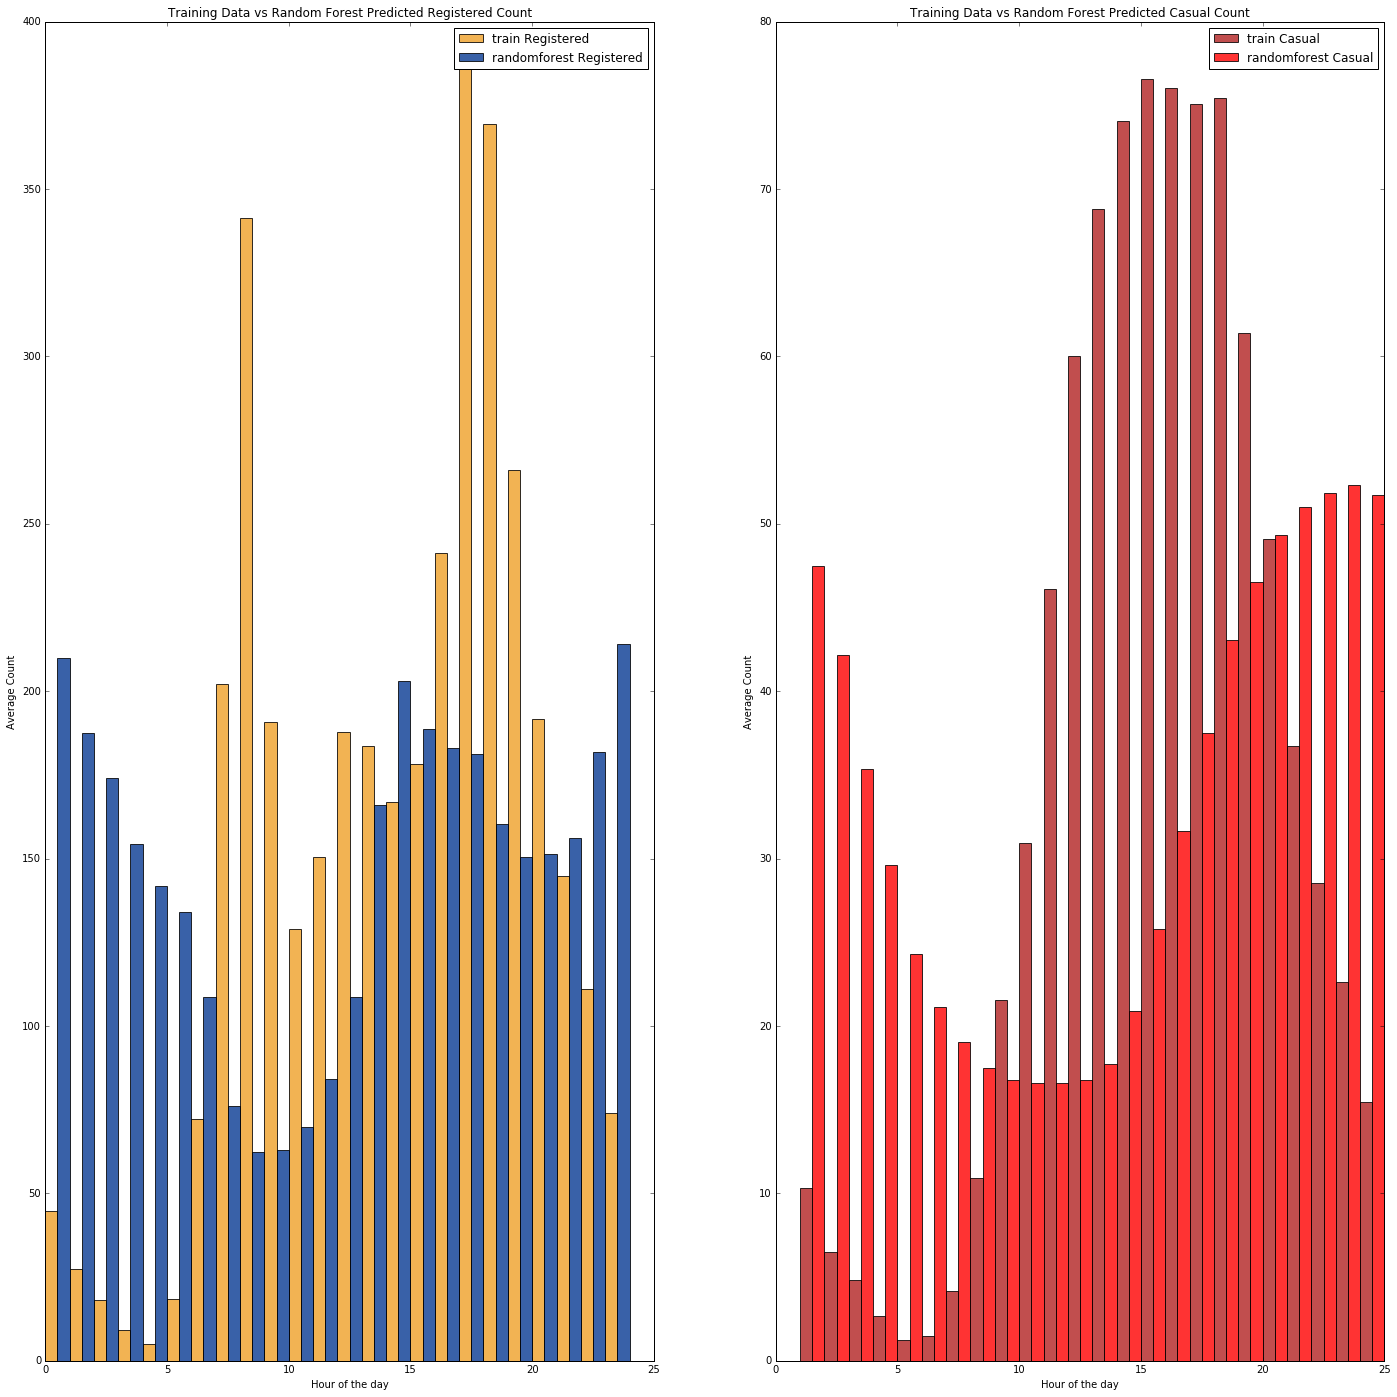

In [39]:

hour = np.zeros(train_data.shape[0])

for i in range(train_data[:,0].shape[0]):
    date = datetime.strptime(train_data[i][0], "%Y-%m-%d %H:%M:%S")
    hour[i] = date.hour

#define a function to 'roll up' data (like excel pivot table)    
def summarize(preds):
    averages = np.empty([24,])
    for i in range(24):
        count = 0
        n = 0
        for h in range(preds.shape[0]):
            if hour[h] == i:
                count += preds[h]
                n += 1
        averages[i] = count/n
    return averages


plt.figure(figsize=(24,24))
plt.xlim(0,24)
bar_width = 0.5
opacity = 0.8

def width_adjust(x):
    x_adjust = []    
    for i in range(24):
        x_adjust.append(hour[i] + x)
    return x_adjust

# Split the charts into two.  
#One for registered and another for casual so that we can see how our prediction follows the training set.

fig1 = plt.subplot(121)
fig1.set_title('Training Data vs Random Forest Predicted Registered Count')
fig1.set_xlabel('Hour of the day')
fig1.set_ylabel('Average Count')

bars_train_reg = fig1.bar(set(hour), summarize(conv_train_data[:,-2]), bar_width,
                 alpha=opacity,
                 color='#efa028',
                 label='train Registered')

bars_rf_reg = fig1.bar(width_adjust(1*bar_width), summarize(results_registered), bar_width,
                 alpha=opacity,
                 color='#073a93',
                 label='randomforest Registered')


fig1.legend()

fig2 = plt.subplot(122)
fig2.set_title('Training Data vs Random Forest Predicted Casual Count')
fig2.set_xlabel('Hour of the day')
fig2.set_ylabel('Average Count')

bars_train_cas = fig2.bar(width_adjust(2*bar_width), summarize(conv_train_data[:,-3]), bar_width,
                 alpha=opacity,
                 color='#B22222',
                 label='train Casual')

bars_rf_cas = fig2.bar(width_adjust(3*bar_width), summarize(results_casual), bar_width,
                 alpha=opacity,
                 color='#FF0000',
                 label='randomforest Casual')

fig2.legend()

It is getting more clear that during the mid-day the prediction follows the train data shape.  
But during the early and late hours the trend between the training and predicted is way off.
The training data trend seems to indicate some kind of bunching.
It looks like early morning hours dont hae signficant activity from 0 -> 4 
(Same way 22 -> 23 shows decreasing trend.)
Activity starts picking up between 5->8.  So we will separate them out.
18, 19 also show some major activity.
20, 21 -> Start a downward trend.  So lets bunch them together.
17 shows a major increase.  So we separate it out.
This whole inference is very subjective.  There must be a better way...

In [20]:
day_train_data = np.empty( (week_train_data.shape[0], week_train_data.shape[1]+1))
day_bin = np.empty( (week_train_data.shape[0], 1) )
for i in range(0, week_train_data.shape[0]):
    # 0 -> 4
    if ( week_train_data[i][1] < 1.0 * 5):
        day_bin[i] = 1 
    # 5 -> 8
    elif ( week_train_data[i][1] < 1.0 * 9):
        day_bin[i] = 2  
    # 9
    elif ( week_train_data[i][1] < 1.0 * 10):
        day_bin[i] = 3 
    # 10 -> 16
    elif ( week_train_data[i][1] < 1.0 * 17):
        day_bin[i] = 4        
    # 17
    elif ( week_train_data[i][1] < 1.0 * 18):
        day_bin[i] = 5 
    # 18, 19
    elif ( week_train_data[i][1] < 1.0 * 20):
        day_bin[i] = 6 
    # 20 , 21
    elif ( week_train_data[i][1] < 1.0 * 22):
        day_bin[i] = 7 
    # 22, 23
    else:
        day_bin[i] = 8  
# Now concatenate with the binning value in the instrumented array
day_train_data = np.concatenate( (week_train_data, day_bin), axis = 1 )


day_test_data = np.empty( (week_test_data.shape[0], week_test_data.shape[1]+1))
day_bin = np.empty( (week_test_data.shape[0], 1) )
for i in range(0, week_test_data.shape[0]):
    if ( week_test_data[i][1] < 1.0 * 5):
        day_bin[i] = 1 
    elif ( week_test_data[i][1] < 1.0 * 9):
        day_bin[i] = 2 
    elif ( week_test_data[i][1] < 1.0 * 10):
        day_bin[i] = 3 
    elif ( week_test_data[i][1] < 1.0 * 17):
        day_bin[i] = 4 
    elif ( week_test_data[i][1] < 1.0 * 18):
        day_bin[i] = 5        
    elif ( week_test_data[i][1] < 1.0 * 20):
        day_bin[i] = 6 
    elif ( week_test_data[i][1] < 1.0 * 22):
        day_bin[i] = 7         
    else:
        day_bin[i] = 8   
day_test_data = np.concatenate( (week_test_data, day_bin), axis = 1 )


# Now run the RCLF

np.random.seed(300)

rf = RandomForestClassifier()

clf = rf.fit(day_train_data, casual_output_data)
results_casual = clf.predict(day_test_data)

clf = rf.fit(day_train_data, registered_output_data)
results_registered = clf.predict(day_test_data)

results = np.add(results_registered, results_casual)
test_lab_f = open("rf_day.csv", "w") 

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in results:    
    test_lab_f.write("\n") 
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()
# Score 0.59398

So far we have assumed that the 2011 and 2012 years are basically the same.  We never checked if they are.  So lets plot the average count of each month for both years to see they are the same.

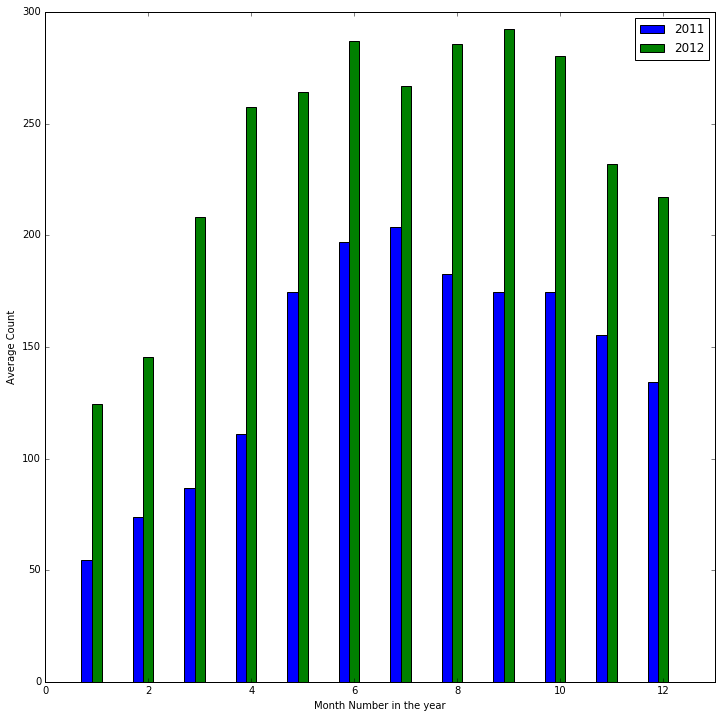

In [21]:
# See the trend on a monthly basis between 2011 and 2012
month = np.zeros(train_data.shape[0])
year = np.zeros(train_data.shape[0])

# Extract the years and months
for i in range(train_data[:,0].shape[0]):
    date = datetime.strptime(train_data[i][0], "%Y-%m-%d %H:%M:%S")
    month[i] = date.month
    year[i] = date.year
    
count_11 = 0 ;
count_12 = 0 ;
for i in range(year.shape[0]):
        if ( year[i] == 2011.0 ):
            count_11 += 1
        else:
            count_12 += 1
            
output_by_2011 = np.zeros( (count_11, ) )
output_by_2012 = np.zeros( (count_12, ) )
month_by_2011 = np.zeros( (count_11, ) )
month_by_2012 = np.zeros( (count_12, ) )

run_11 = 0 
run_12 = 0 
for i in range(year.shape[0]):
        if ( year[i] == 2011.0 ):
            output_by_2011[run_11] = new_output_data[i]
            month_by_2011[run_11] = month[i]
            run_11 += 1
        else:
            output_by_2012[run_12] = new_output_data[i]
            month_by_2012[run_12] = month[i]
            run_12 += 1    
            
#define a function to 'roll up' data (like excel pivot table)    
def summarize(preds, month):
    averages = np.empty([12,])
    for i in range(1, 13):
        count = 0
        n = 0
        for h in range(preds.shape[0]):
            if month[h] == i:
                count += preds[h]
                n += 1
        averages[i-1] = count/n
    return averages

plt.figure(figsize=(12,12))
plt.xlim(0,13)


def width_adjust(x, month):
    x_adjust = []    
    for i in range(12):
        x_adjust.append(month[i] + x)
    return x_adjust



ax = plt.subplot(111)
ax.set_xlabel('Month Number in the year')
ax.set_ylabel('Average Count')
b_2011 = ax.bar(np.array(list(set(month_by_2011))) - 0.2, summarize(output_by_2011, month_by_2011),width=0.2,color='b',align='center', label='2011')
b_2012 = ax.bar(np.array(list(set(month_by_2011))), summarize(output_by_2012, month_by_2012),width=0.2,color='g',align='center', label='2012')



plt.legend(handles=[b_2011, b_2012])


plt.show()

The trend clearly shows an increase in count across all months between 2011 and 2012. So we need to instrument the year and month also as one of the variables:

          

In [22]:
# The array we have so far is the follows
# 0 -> Weekday instrumented
# 1 -> Hour instrumented
# 2 -> Minute instrumented
# 3 -> Seconds instrumented
# 4 -> Season
# 5 -> Holiday
# 6 -> Working Day
# 7 -> Weather
# 8 -> Temp binned
# 9 -> Humidity binned
# 10 -> windspeed binned
# 11 -> Weekend instrumented
# 12 -> day binned


# Lets add the month and year also
ym_train_data = np.empty( (day_train_data.shape[0], day_train_data.shape[1]+2))
ym_array = np.empty( (day_train_data.shape[0], 2) )
for i in range(ym_array.shape[0]):
    date = datetime.strptime(train_data[i][0], "%Y-%m-%d %H:%M:%S")
    ym_array[i][0] = date.year
    ym_array[i][1] = date.month
ym_train_data = np.concatenate( (day_train_data, ym_array), axis = 1 )       

ym_test_data = np.empty( (day_test_data.shape[0], day_test_data.shape[1]+2))
ym_array = np.empty( (day_test_data.shape[0], 2) )
for i in range(ym_array.shape[0]):
    date = datetime.strptime(test_data[i][0], "%Y-%m-%d %H:%M:%S")
    ym_array[i][0] = date.year
    ym_array[i][1] = date.month
ym_test_data = np.concatenate( (day_test_data, ym_array), axis = 1 ) 

# The array we have so far is the follows
# 0 -> Weekday instrumented
# 1 -> Hour instrumented
# 2 -> Minute instrumented
# 3 -> Seconds instrumented
# 4 -> Season
# 5 -> Holiday
# 6 -> Working Day
# 7 -> Weather
# 8 -> Temp binned
# 9 -> Humidity binned
# 10 -> windspeed binned
# 11 -> Weekend instrumented
# 12 -> day binned
# 13 -> Year
# 14 -> Month

# Now run the RCLF

np.random.seed(300)

rf = RandomForestClassifier()

clf = rf.fit(ym_train_data, casual_output_data)
results_casual = clf.predict(ym_test_data)

clf = rf.fit(ym_train_data, registered_output_data)
results_registered = clf.predict(ym_test_data)

results = np.add(results_registered, results_casual)
test_lab_f = open("rf_ym.csv", "w") 

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in results:    
    test_lab_f.write("\n") 
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()
# Score 0.60964

Lets do one more instrumentation.  Looking at the data between training and test, we have assumed that season variable 
will follow the exact quarters in an year.  But looking at the raw data that is not the case.  So lets create a instrumented variable that identifies quarters in an year.  

In [23]:
# The array we have so far is the follows
# 0 -> Weekday instrumented
# 1 -> Hour instrumented
# 2 -> Minute instrumented
# 3 -> Seconds instrumented
# 4 -> Season
# 5 -> Holiday
# 6 -> Working Day
# 7 -> Weather
# 8 -> Temp binned
# 9 -> Humidity binned
# 10 -> windspeed binned
# 11 -> Weekend instrumented
# 12 -> day binned
# 13 -> Year
# 14 -> Month

# Now lets convert the months to quaters
qrt_train_data = np.empty( (ym_train_data.shape[0], ym_train_data.shape[1]+1))
qrt_array = np.empty( (ym_train_data.shape[0], 1) )
for i in range(qrt_array.shape[0]):
        date = datetime.strptime(train_data[i][0], "%Y-%m-%d %H:%M:%S")
        if ( date.month < 4 ):
            qrt_array[i] = 1 
        elif (date.month < 7):
            qrt_array[i] = 2 
        elif (date.month < 10):
            qrt_array[i] = 3 
        else:
            qrt_array[i] = 4 
qrt_train_data = np.concatenate( (ym_train_data, qrt_array), axis = 1 )       

qrt_test_data = np.empty( (ym_test_data.shape[0], ym_test_data.shape[1]+1))
qrt_array = np.empty( (ym_test_data.shape[0], 1) )
for i in range(qrt_array.shape[0]):
        date = datetime.strptime(test_data[i][0], "%Y-%m-%d %H:%M:%S")
        if ( date.month < 4 ):
            qrt_array[i] = 1 
        elif (date.month < 7):
            qrt_array[i] = 2 
        elif (date.month < 10):
            qrt_array[i] = 3 
        else:
            qrt_array[i] = 4 
qrt_test_data = np.concatenate( (ym_test_data, qrt_array), axis = 1 )       



# The array we have so far is the follows
# 0 -> Weekday instrumented
# 1 -> Hour instrumented
# 2 -> Minute instrumented
# 3 -> Seconds instrumented
# 4 -> Season
# 5 -> Holiday
# 6 -> Working Day
# 7 -> Weather
# 8 -> Temp binned
# 9 -> Humidity binned
# 10 -> windspeed binned
# 11 -> Weekend instrumented
# 12 -> day binned
# 13 -> Year
# 14 -> Month
# 15 -> Instrumented quarter

# Now run the RCLF

np.random.seed(300)

rf = RandomForestClassifier()

clf = rf.fit(qrt_train_data, casual_output_data)
results_casual = clf.predict(qrt_test_data)

clf = rf.fit(qrt_train_data, registered_output_data)
results_registered = clf.predict(qrt_test_data)

results = np.add(results_registered, results_casual)
test_lab_f = open("rf_qrt.csv", "w") 

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in results:    
    test_lab_f.write("\n") 
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()
# Score 0.58120  

We have done all the instrumentation we can with the classifier.  So lets jump on to the regressor as we know that our problem 
is a regression problem.
Also bring in the logs for the outputs

In [24]:

rf = RandomForestRegressor(n_estimators=100)

clf = rf.fit(qrt_train_data, log_output_vars[:,0])
results_casual_log = clf.predict(qrt_test_data)

clf = rf.fit(qrt_train_data, log_output_vars[:,1])
results_registered_log = clf.predict(qrt_test_data)

# Use expm1 as we did a log transformation by adding 1 to the variables
results_casual = [expm1(el) for el in results_casual_log]
results_registered = [expm1(el) for el in results_registered_log]

results = np.add(results_registered, results_casual)
test_lab_f = open("rf_qrt_log.csv", "w") 

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in results:    
    test_lab_f.write("\n") 
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()
# Score .45493

### SVM

Lets try SVM with the default kernel rbf as rbf fits the points better than the other kernels.

In [25]:

np.random.seed(300)


rf = svm.SVR()

clf = rf.fit(qrt_train_data, log_output_vars[:,0])
results_casual_log = clf.predict(qrt_test_data)

clf = rf.fit(qrt_train_data, log_output_vars[:,1])
results_registered_log = clf.predict(qrt_test_data)

results_casual = np.empty(results_casual_log.shape)
results_registered = np.empty(results_registered_log.shape)

for i in range(results_casual_log.shape[0]):
    results_casual[i] = expm1(results_casual_log[i])
    results_registered[i] = expm1(results_registered_log[i])

results = np.add(results_registered, results_casual)
test_lab_f = open("svm_qrt_log.csv", "w") 

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in results:    
    test_lab_f.write("\n") 
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()
# Score .44726

Lets plot.

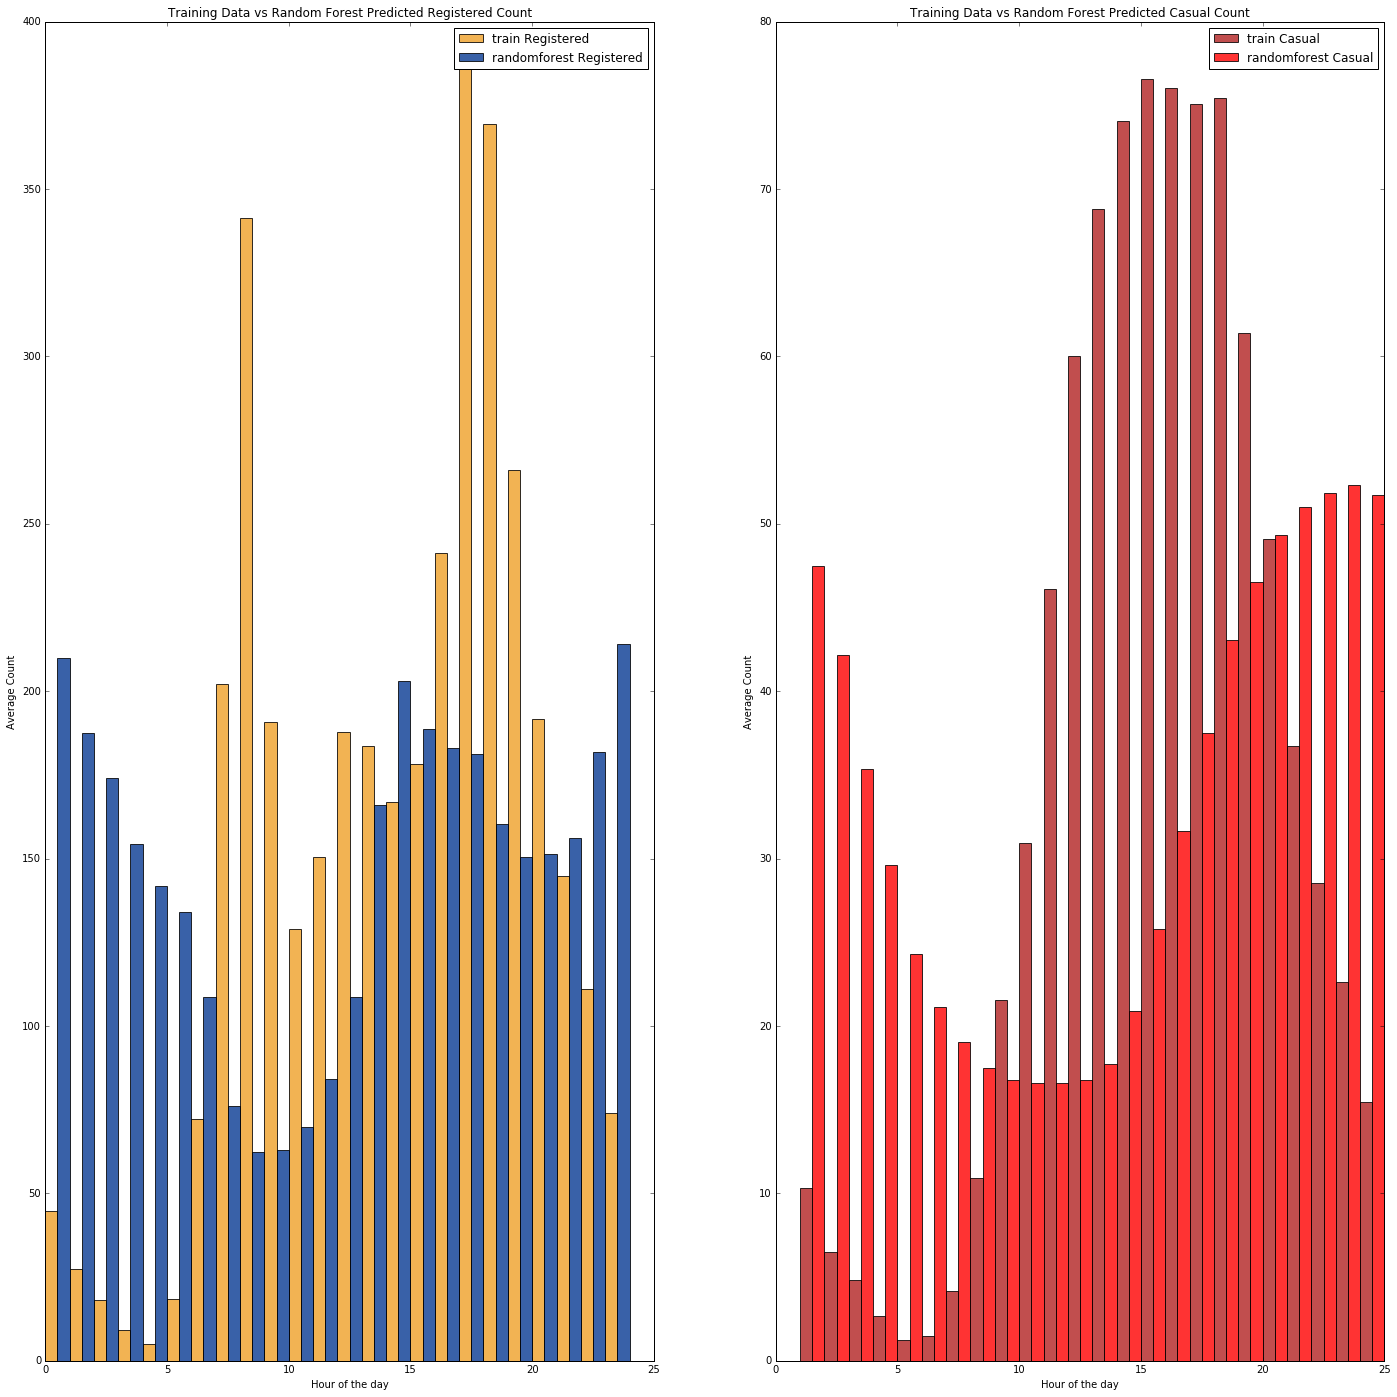

In [38]:

hour = np.zeros(train_data.shape[0])

for i in range(train_data[:,0].shape[0]):
    date = datetime.strptime(train_data[i][0], "%Y-%m-%d %H:%M:%S")
    hour[i] = date.hour

#define a function to 'roll up' data (like excel pivot table)    
def summarize(preds):
    averages = np.empty([24,])
    for i in range(24):
        count = 0
        n = 0
        for h in range(preds.shape[0]):
            if hour[h] == i:
                count += preds[h]
                n += 1
        averages[i] = count/n
    return averages


plt.figure(figsize=(24,24))
plt.xlim(0,24)
bar_width = 0.5
opacity = 0.8

def width_adjust(x):
    x_adjust = []    
    for i in range(24):
        x_adjust.append(hour[i] + x)
    return x_adjust

# Split the charts into two.  
#One for registered and another for casual so that we can see how our prediction follows the training set.

fig1 = plt.subplot(121)
fig1.set_title('Training Data vs Random Forest Predicted Registered Count')
fig1.set_xlabel('Hour of the day')
fig1.set_ylabel('Average Count')

bars_train_reg = fig1.bar(set(hour), summarize(conv_train_data[:,-2]), bar_width,
                 alpha=opacity,
                 color='#efa028',
                 label='train Registered')

bars_rf_reg = fig1.bar(width_adjust(1*bar_width), summarize(results_registered), bar_width,
                 alpha=opacity,
                 color='#073a93',
                 label='randomforest Registered')


fig1.legend()

fig2 = plt.subplot(122)
fig2.set_title('Training Data vs Random Forest Predicted Casual Count')
fig2.set_xlabel('Hour of the day')
fig2.set_ylabel('Average Count')

bars_train_cas = fig2.bar(width_adjust(2*bar_width), summarize(conv_train_data[:,-3]), bar_width,
                 alpha=opacity,
                 color='#B22222',
                 label='train Casual')

bars_rf_cas = fig2.bar(width_adjust(3*bar_width), summarize(results_casual), bar_width,
                 alpha=opacity,
                 color='#FF0000',
                 label='randomforest Casual')

fig2.legend()


Lets run a few more regressors to conclude SVM regressor is the best.
We are going to run the linear regression, lasso and ridge for comparison purpose.

### All Scores Listed (with different techniques)

In [27]:
rdg= linear_model.Ridge (alpha = .5)
clf = rdg.fit(qrt_train_data, 
              log_output_vars[:,0])
results_casual_log = rdg.predict(qrt_test_data)

clf = rdg.fit(qrt_train_data, log_output_vars[:,1])
results_registered_log = rdg.predict(qrt_test_data)


results_casual = np.empty(results_casual_log.shape)
results_registered = np.empty(results_registered_log.shape)

for i in range(results_casual_log.shape[0]):
    results_casual[i] = expm1(results_casual_log[i])
    results_registered[i] = expm1(results_registered_log[i])

#results_casual = [expm1(el) for el in results_casual_log]
#results_registered = [expm1(el) for el in results_registered_log]



results = np.add(results_registered, results_casual)
test_lab_f = open("rdg_qrt_log.csv", "w") 

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in results:    
    test_lab_f.write("\n") 
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()
# 1.02599

In [28]:
lasso = linear_model.Lasso(alpha = 0.1)

clf = lasso.fit(qrt_train_data, 
              log_output_vars[:,0])
results_casual_log = lasso.predict(qrt_test_data)

clf = lasso.fit(qrt_train_data, log_output_vars[:,1])
results_registered_log = lasso.predict(qrt_test_data)


results_casual = np.empty(results_casual_log.shape)
results_registered = np.empty(results_registered_log.shape)

for i in range(results_casual_log.shape[0]):
    results_casual[i] = expm1(results_casual_log[i])
    results_registered[i] = expm1(results_registered_log[i])

#results_casual = [expm1(el) for el in results_casual_log]
#results_registered = [expm1(el) for el in results_registered_log]


results = np.add(results_registered, results_casual)
test_lab_f = open("lasso_qrt_log.csv", "w") 

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in results:    
    test_lab_f.write("\n") 
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()
# 1.05687

In [29]:
lr = LinearRegression(fit_intercept=True)
# Count is the output for which the input is trained
lr.fit(qrt_train_data, log_output_vars[:,0]) 
results_casual_log = lr.predict(qrt_test_data)

lr.fit(qrt_train_data, log_output_vars[:,1]) 
results_registered_log = lr.predict(qrt_test_data)

results = np.add(results_registered, results_casual)


test_lab_f = open("linear_qrt_log.csv", "w")

test_lab_f.write(str(test_labels[0,0]) + "," + str(train_labels[0, -1]))

idx = 0
                 
for pp in lr_preds:    
    test_lab_f.write("\n")
    if ( pp < 0.0 ):
        pp = 0.0
    test_lab_f.write(str(test_data[:,0][idx]) + "," + str(int(pp)))
    idx += 1
   

test_lab_f.close()
# 1.26607

The Kaggle scores for various iterations are,

1. Basic Linear regression = 1.43455
2. Linear regression with atemp removed = 1.42884
3. Basic K-neighbor classifier = 1.66165
4. Basic K-neighbor classifier (n=1) with atemp removed = 1.6585
5. Basic K-neighbor classifier (n=2) with atemp removed = 1.76267
6. Basic K-neighbor classifier (n=3) with atemp removed = 1.90713
7. Basic Instrumentation Linear Regression = 1.26685
8. Basic Instrumentation K-neighbor classifier = 0.94964
9. Basic Instrumentation Random Forest Classifier = 0.88612
10. Basic Instrumentation Linear Regression with atemp removed = 1.26607
11. Basic Instrumentation K-neighbor classifier atemp removed = 0.91618
12. Basic Instrumentation Random Forest Classifier atemp removed = 0.88345
13. Basic Instrumentation Random Forest Classifier atemp removed and registered/casual split = 0.78115
14. Random Forest Classifier with windspeed, temp, humidity binning = 0.67546
15. Random Forest Classifier with weekday, weekend instrumentation = 0.65737
16. Random Forest Classifier with hour binning = 0.59398
17. Random Forest Classifier with year and month instrumentation = 0.60964
18. Random Forest Classifier with quarters instrumentation = 0.58120

19. Random forest regressor with all the instrumentation and binning = .45493
20. SVM regressor with all the instrumentation and binning = .44726
21. Ridge regressor with all the instrumentation and binning = 1.02599
22. Lasso regressor with all the instrumentation and binning = 1.05687
23. Linear regressor with all the instrumentation and binning = 1.26607

## Pandas Application
--------------




In [32]:
panda_train_data = pd.read_csv("train.csv", header=0)
panda_test_data = pd.read_csv("test.csv", header=0)

print ('Modify features in the dataset')

# Modifications for train data
panda_train_data['hour'] = panda_train_data['datetime'].str[11:13]
panda_train_data['year'] = panda_train_data['datetime'].str[0:4]
panda_train_data['weekday'] = pd.to_datetime(panda_train_data['datetime']).dt.dayofweek
train_count = panda_train_data['count'].values
panda_train_data = panda_train_data.drop(['datetime','casual','registered','count'], axis=1)
train = panda_train_data.values

# Modifications for test data to maintain feature parity
panda_test_data['hour'] = panda_test_data['datetime'].str[11:13]
panda_test_data['year'] = panda_test_data['datetime'].str[0:4]
panda_test_data['weekday'] = pd.to_datetime(panda_test_data['datetime']).dt.dayofweek
dates = panda_test_data['datetime'].values
panda_test_data = panda_test_data.drop(['datetime'], axis=1)
test = panda_test_data.values


print ('Train using Random Forest Regressor')
forest = RandomForestRegressor(n_estimators=100)
forest = forest.fit(train,train_count)

print ('Prediction')
pred = forest.predict(test).astype(int)

print ('Writing file')
pred_file = open("rfr_results_panda.csv","w")
open_csv = csv.writer(pred_file)
open_csv.writerow(["datetime","count"])
open_csv.writerows(zip(dates, pred))
pred_file.close()

# Kaggle score - 0.41843

Modify features in the dataset
Train using Random Forest Regressor
Prediction
Writing file


In [33]:
np.random.seed(300)

panda_train_data = pd.read_csv("train.csv", header=0)
panda_test_data = pd.read_csv("test.csv", header=0)

print ('Modify features in the dataset')

# Modifications for train data
panda_train_data['hour'] = panda_train_data['datetime'].str[11:13]
panda_train_data['year'] = panda_train_data['datetime'].str[0:4]
panda_train_data['weekday'] = pd.to_datetime(panda_train_data['datetime']).dt.dayofweek
train_count = panda_train_data['count'].values
panda_train_data = panda_train_data.drop(['datetime','casual','registered','count'], axis=1)
train = panda_train_data.values

# Modifications for test data to maintain feature parity
panda_test_data['hour'] = panda_test_data['datetime'].str[11:13]
panda_test_data['year'] = panda_test_data['datetime'].str[0:4]
panda_test_data['weekday'] = pd.to_datetime(panda_test_data['datetime']).dt.dayofweek
dates = panda_test_data['datetime'].values
panda_test_data = panda_test_data.drop(['datetime'], axis=1)
test = panda_test_data.values

model = svm.SVR()
model = model.fit(train,train_count)

print ('Prediction')
pred = model.predict(test).astype(int)

print ('Writing file')
pred_file = open("svm_results_panda.csv","w")
open_csv = csv.writer(pred_file)
open_csv.writerow(["datetime","count"])
open_csv.writerows(zip(dates, pred))
pred_file.close()

# Score 1.46071

Modify features in the dataset
Prediction
Writing file


In [34]:
panda_train_data = pd.read_csv("train.csv", header=0)
panda_test_data = pd.read_csv("test.csv", header=0)

print ('Modify features in the dataset')

# Modifications for train data
panda_train_data['hour'] = panda_train_data['datetime'].str[11:13]
panda_train_data['year'] = panda_train_data['datetime'].str[0:4]
panda_train_data['weekday'] = pd.to_datetime(panda_train_data['datetime']).dt.dayofweek
train_casual = panda_train_data['casual'].values
train_registered = panda_train_data['registered'].values
panda_train_data = panda_train_data.drop(['datetime','casual','registered','count'], axis=1)
train = panda_train_data.values

# Modifications for test data to maintain feature parity
panda_test_data['hour'] = panda_test_data['datetime'].str[11:13]
panda_test_data['year'] = panda_test_data['datetime'].str[0:4]
panda_test_data['weekday'] = pd.to_datetime(panda_test_data['datetime']).dt.dayofweek
dates = panda_test_data['datetime'].values
panda_test_data = panda_test_data.drop(['datetime'], axis=1)
test = panda_test_data.values


print ('Train with casual users using Random Forest Regressor')
forest_casual = RandomForestRegressor(n_estimators=100)
forest_casual = forest_casual.fit(train,train_casual)

print ('Prediction with casual users')
pred_casual = forest_casual.predict(test).astype(int)

print ('Train with registered users using Random Forest Regressor')
forest_registered = RandomForestRegressor(n_estimators=100)
forest_registered = forest_registered.fit(train,train_registered)

print ('Prediction with registered users')
pred_registered = forest_registered.predict(test).astype(int)


print ('Writing file')
pred_file = open("rfr_results_regcasual_panda.csv","w")
open_csv = csv.writer(pred_file)
open_csv.writerow(["datetime","count"])
open_csv.writerows(zip(dates, (pred_casual + pred_registered)))
pred_file.close()

# Kaggle score - 0.40748

Modify features in the dataset
Train with casual users using Random Forest Regressor
Prediction with casual users
Train with registered users using Random Forest Regressor
Prediction with registered users
Writing file


In [35]:
panda_train_data = pd.read_csv("train.csv", header=0)
panda_test_data = pd.read_csv("test.csv", header=0)

print ('Modify features in the dataset')

# Modifications for train data
panda_train_data['hour'] = panda_train_data['datetime'].str[11:13]
panda_train_data['year'] = panda_train_data['datetime'].str[0:4]
panda_train_data['weekday'] = pd.to_datetime(panda_train_data['datetime']).dt.dayofweek
train_casual = np.log(panda_train_data['casual'].values + 1) 
train_registered = np.log(panda_train_data['registered'].values + 1)
panda_train_data = panda_train_data.drop(['datetime','casual','registered','count'], axis=1)
train = panda_train_data.values

# Modifications for test data to maintain feature parity
panda_test_data['hour'] = panda_test_data['datetime'].str[11:13]
panda_test_data['year'] = panda_test_data['datetime'].str[0:4]
panda_test_data['weekday'] = pd.to_datetime(panda_test_data['datetime']).dt.dayofweek
dates = panda_test_data['datetime'].values
panda_test_data = panda_test_data.drop(['datetime'], axis=1)
test = panda_test_data.values


print ('Train with casual users using Random Forest Regressor')
forest_casual = RandomForestRegressor(n_estimators=100)
forest_casual = forest_casual.fit(train,train_casual)

print ('Prediction with casual users')
pred_casual = forest_casual.predict(test).astype(int)

print ('Train with registered users using Random Forest Regressor')
forest_registered = RandomForestRegressor(n_estimators=100)
forest_registered = forest_registered.fit(train,train_registered)

print ('Prediction with registered users')
pred_registered = forest_registered.predict(test).astype(int)


print ('Writing file')
pred_file = open("rfr_results_regcasual_log_panda.csv","w")
open_csv = csv.writer(pred_file)
open_csv.writerow(["datetime","count"])
open_csv.writerows(zip(dates, ((np.exp(pred_casual) -1) + (np.exp(pred_registered) - 1))))
pred_file.close()

# Kaggle score - 0.67491

Modify features in the dataset
Train with casual users using Random Forest Regressor
Prediction with casual users
Train with registered users using Random Forest Regressor
Prediction with registered users
Writing file


## Final Results & Analysis

The best kaggle score we got with instrumentation and binning was with SVM regressor
With Pandas we were able to improve the score better
The analysis shows that regression model is the better fit for the project than a classifier
Our data analysis shows that early morning trend between training data and predicted output is still not good.  If this issue could be solved we are pretty positive that our kaggle score will improve further
Binning was made in an adhoc manner.  We could extend the binning process using some kind of decision tree algorithm to mathematically determine a better binning for all the continous variables.
Pandas with very basic instrumentation gave us very good results.  We would like to investigate this futher.

## Possible Future Extension

This project has two possible future extensions. While, on a detailed level, our team could continue to work on getting an improved score, as well as continue to explore for other insights in the data, at a high level, the study of user behavior has applications beyond this bike share dataset. Theoretically, we could go on to apply our functions and algorithms to other similar problems such as ones that Uber and Lyft face, other forms of public transportation such as BART and AC transit and even customer demands at shopping centers and local stores. 